## Neural Network Classification of Hypertensive Hearts by CMR Measures 

In this analysis I am using a basic neural network to perform classification of between people with hypertension, given their deomgraphics and their measurements derived cardiac magnetic resonance (CMR) imaging.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [50]:
heart= pd.read_csv("heart_disease.csv")
print(heart.head())

y=  heart.hyperten.values
X=  heart.drop("hyperten", axis=1).values

print(X.shape)

   sex  ethnicity  diabetes  hyperten  highchol  prevMI  smok_status  \
0    0          0         1         1         1       0            0   
1    0          0         0         0         0       0            1   
2    1          0         0         0         0       0            0   
3    0          0         0         0         0       0            1   
4    0          1         0         0         1       0            1   

    cmr_LVEF  smokerCurrent      age_5       bsa     bmi_5  cmr_LVEDV_i  \
0  64.465409              0  12.733196  1.744422  5.562500    73.012494   
1  59.775877              0  14.282820  1.739263  5.156385    65.073337   
2  63.243244              0  14.483231  2.139494  5.872084    80.808893   
3  52.413793              0  12.049829  1.831942  5.826339    52.835628   
4  66.229023              0  14.133333  1.853893  5.991946    78.246369   

   cmr_LVESV_i  cmr_LVM_i  asi_combined   cmr_RVEF  cmr_RVEDV_i  cmr_RVESV_i  
0    25.944691  43.816107      11.594

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [76]:
scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)
test_features  = scaler.transform(X_test)

In [78]:

# Create a Sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1000, input_shape=(18,), activation='relu'))
#model.add(Dropout(0.05))
model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model for 20 epochs
history= model.fit(X_train, y_train, epochs=30, validation_split = 0.3, batch_size= 50)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

Train on 10866 samples, validate on 4658 samples
Epoch 1/30
10866/10866 [==============================] - 0s 46us/step - loss: 0.6849 - accuracy: 0.6652 - val_loss: 0.5824 - val_accuracy: 0.6846
Epoch 2/30
10866/10866 [==============================] - 0s 31us/step - loss: 0.5749 - accuracy: 0.6917 - val_loss: 0.6541 - val_accuracy: 0.5419
Epoch 3/30
10866/10866 [==============================] - 0s 32us/step - loss: 0.5562 - accuracy: 0.7258 - val_loss: 0.5404 - val_accuracy: 0.7411
Epoch 4/30
10866/10866 [==============================] - 0s 32us/step - loss: 0.5455 - accuracy: 0.7371 - val_loss: 0.5254 - val_accuracy: 0.7570
Epoch 5/30
10866/10866 [==============================] - 0s 32us/step - loss: 0.5396 - accuracy: 0.7412 - val_loss: 0.5269 - val_accuracy: 0.7581
Epoch 6/30
10866/10866 [==============================] - 0s 31us/step - loss: 0.5307 - accuracy: 0.7506 - val_loss: 0.5343 - val_accuracy: 0.7435
Epoch 7/30
10866/10866 [==============================] - 0s 34us/ste

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate predictions: predictions
predictions = model.predict_classes(X_test)

print(confusion_matrix(y_test, predictions))

# Create the performance report
print(classification_report(y_test, predictions))

[[2401  245]
 [ 644  592]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      2646
           1       0.71      0.48      0.57      1236

    accuracy                           0.77      3882
   macro avg       0.75      0.69      0.71      3882
weighted avg       0.76      0.77      0.76      3882



The neural network seems to do a reasonable job at classifying hypertensive hearts from non-hypertensive, however this is not very much of an improvement upon results achieved with an ordinary logistic regression model (in other analysis).  At any rate, let's explore the training and test loss and accuracy.

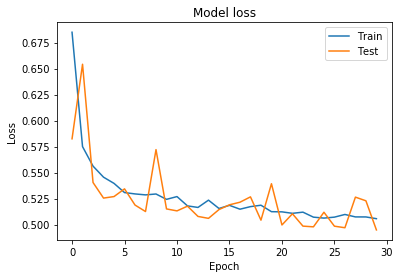

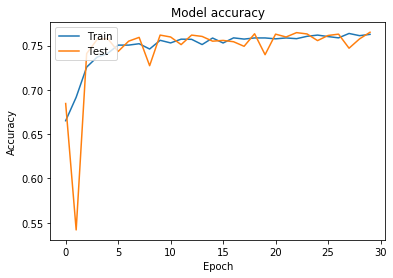

In [80]:
# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

In [57]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

In [58]:
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()